In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

## Пропущенные значения

In [21]:
data = pd.read_table("data.adult.csv", sep=",")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [22]:
for column in ('occupation', 'workclass'):
    data = data.drop(data[data[column] == '?'].index)

In [45]:
X = np.array(data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
y = np.array(data['>50K,<=50K']) == '>50K'

## Перебор деревьев

In [83]:
n_estimators = 100
scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
random_forest = RandomForestClassifier(n_estimators=n_estimators)
random_forest.fit(X_train, y_train);

**точка с запятой**

In [84]:
estimators = random_forest.estimators_
estimator_range = np.arange(1, n_estimators + 1)
for estimators_cnt in estimator_range:
    random_forest.estimators_ = estimators[:estimators_cnt]
    y_predict = random_forest.predict(X_test)
    scores.append(roc_auc_score(y_test, y_predict))

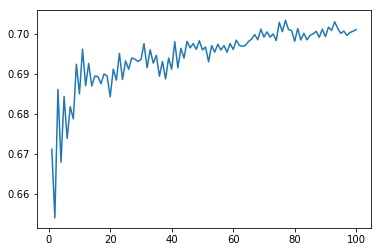

In [85]:
plt.plot(estimator_range, scores);

## Масштаб и размер графиков

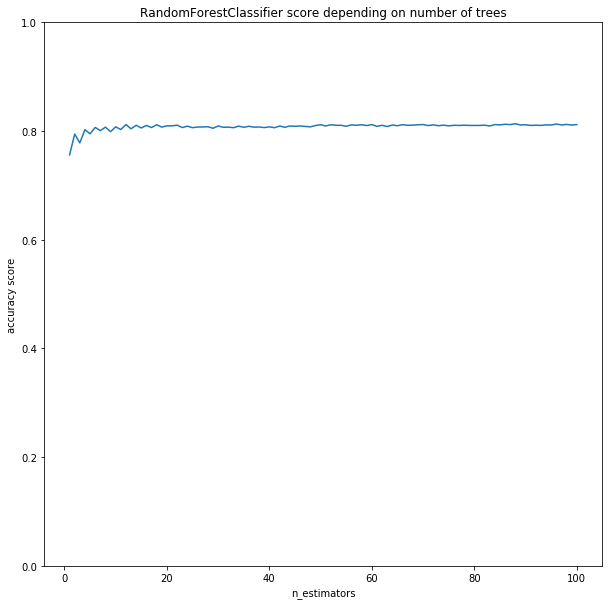

In [72]:
plt.figure(figsize=(10, 10))
plt.plot(estimator_range, scores)
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('accuracy score')
plt.title('RandomForestClassifier score depending on number of trees');

## Дублирование кода

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(estimator_range, scores)
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.title('RandomForestClassifier score depending on number of trees');

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(estimator_range2, scores2)
plt.ylim(0, 1)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.title('KNeighborsClassifier score depending on number of neighbors');

In [63]:
def plot_scores(param_range, scores, xlabel, ylabel, title):
    plt.figure(figsize=(12, 8))
    plt.plot(other_estimator_range, other_scores)
    plt.ylim(0, 1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

## Однобуквенные переменные

In [ ]:
for i in a:
    if i == q:
        b.append(x)
    else:
        x += 1

## Сокращения

In [ ]:
for clf in (rfc, dtc, knc):
    clf.fit(X_tr, y_tr)
    y_pr = clf.predict(x_tst)
    scr = roc_auc_score(y_tst, y_pr)

## Цифры в конце имен

`classifier1`, `grid_2`, `scores3`...

In [68]:
param_grid = {
    'RandomForestClassifier': {'max_depth': range(5, 10)},
    'KNeighborsClassifier': {'n_neighbors': range(3, 7)}
}
for classifier in (RandomForestClassifier, KNeighborsClassifier):
    grid_searcher = GridSearchCV(classifier, param_grid[classifier.__name__])
    pass

## Выбор глубины для случайного леса

## Seed

## Обучение и тест на одних и тех же данных

## Время работы и время обучения

## Теория